# Problem Statement

A Russian automobile company "Tsars Automobiles" aspires to enter the German market by setting up their manufacturing unit there and producing cars locally to give competition to their German and other European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the German market, since those may be very different from the Russian market. The company wants to know:

Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the German market.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split  # for train test split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
df= pd.read_csv(r'C:\Users\Shelby\Programming\Datasets\Car\CarPrice_Assignment.csv')

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.drop('car_ID',axis=1)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [9]:
num=[f for f in df.columns if df[f].dtype != 'object' ]

In [10]:
df[num].dtypes

car_ID                int64
symboling             int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [11]:
df[num].head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
cnum=[f for f in df.columns if df[f].dtype == 'object' ]

In [13]:
df['boreratio'].describe()

count    205.000000
mean       3.329756
std        0.270844
min        2.540000
25%        3.150000
50%        3.310000
75%        3.580000
max        3.940000
Name: boreratio, dtype: float64

In [14]:
df[cnum].dtypes

CarName           object
fueltype          object
aspiration        object
doornumber        object
carbody           object
drivewheel        object
enginelocation    object
enginetype        object
cylindernumber    object
fuelsystem        object
dtype: object

In [15]:
df[cnum].head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


# Inorder to remove the model name from car name 

In [16]:
type(df['CarName'])

pandas.core.series.Series

In [17]:
k=0
for i in df['CarName']:
    
    i= str(i).split(' ')
    df['CarName'][k] =str(i[0])
    k+=1
type(i)

C:\Users\Shelby\AppData\Local\Temp\ipykernel_15308\2256884381.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CarName'][k] =str(i[0])


list

In [18]:
df['CarName']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [19]:
df['CarName'].unique()## Many Car names have duplicate values so

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [20]:
df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [21]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [22]:
df1=pd.DataFrame(df['CarName'].value_counts())

df1.head()

,CarName
toyota,32
Nissan,18
mazda,17
mitsubishi,13
honda,13


In [23]:
df1=df1.reset_index()

In [24]:
df1=df1.rename(columns={'index':'car_name','CarName': 'count'})

In [25]:
df1.head()

,car_name,count
0,toyota,32
1,Nissan,18
2,mazda,17
3,mitsubishi,13
4,honda,13


## BAR plot

<Axes: xlabel='count', ylabel='car_name'>

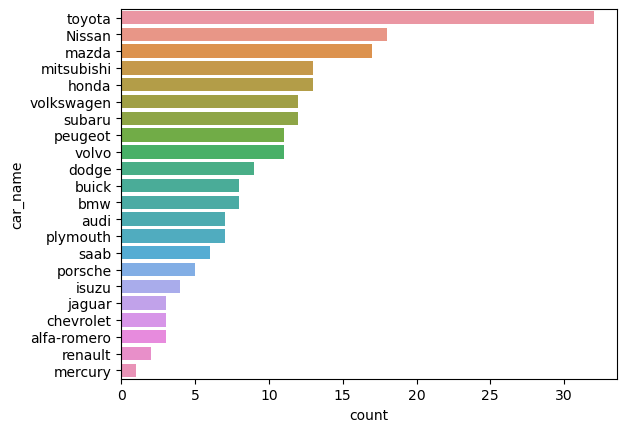

In [26]:
sns.barplot(y='car_name',x='count',data=df1)## counting number of cars of very brand

# Fuel Type 

In [27]:
fuel=pd.DataFrame(df['fueltype'].value_counts())

In [28]:
fuel.head()

,fueltype
gas,185
diesel,20


In [29]:
fuel=fuel.reset_index().rename(columns={'index':'fueltype','fueltype':'count'})

In [30]:
fuel

,fueltype,count
0,gas,185
1,diesel,20


Text(0.5, 1.0, 'Ratio of Gas and Diesel')

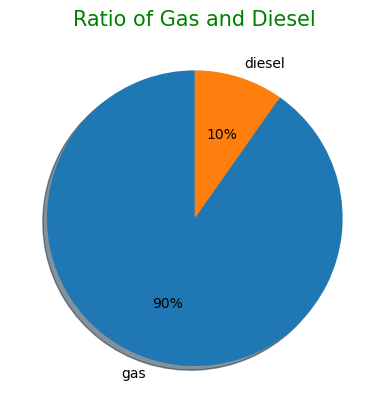

In [33]:
plt.pie(fuel['count'],labels=fuel['fueltype'],shadow= True,startangle=90,autopct='%1.0f%%');
plt.title('Ratio of Gas and Diesel',fontsize=15,color='green')


# Converting Categorical to Numerical data

In [34]:
encoder = []
datac=df[cnum]##assigning all the categorical variable to new variable

In [35]:
catc=df[cnum].columns
catc

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [36]:

encoder={}
for i in catc:
    encoder[i]=LabelEncoder();
    datac[i]=encoder[i].fit_transform(datac[i]);
    

C:\Users\Shelby\AppData\Local\Temp\ipykernel_15308\2648101461.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datac[i]=encoder[i].fit_transform(datac[i]);
C:\Users\Shelby\AppData\Local\Temp\ipykernel_15308\2648101461.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datac[i]=encoder[i].fit_transform(datac[i]);
C:\Users\Shelby\AppData\Local\Temp\ipykernel_15308\2648101461.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [37]:
datac.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,1,1,0,1,0,2,0,0,2,5
1,1,1,0,1,0,2,0,0,2,5
2,1,1,0,1,2,2,0,5,3,5
3,2,1,0,0,3,1,0,3,2,5
4,2,1,0,0,3,0,0,3,1,5


# Merging the categorical to numerical data set

In [38]:
join=[datac,df[num]]
df2=pd.concat(join,axis=1)

In [39]:
df2.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,5,3,5,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,1,0,3,2,5,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,0,3,1,5,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


# Finding correlation amoung the Values

In [41]:
df2.corr()['price'].sort_values()

highwaympg         -0.697599
citympg            -0.685751
CarName            -0.173728
car_ID             -0.109093
fueltype           -0.105679
peakrpm            -0.085267
carbody            -0.083976
symboling          -0.079978
doornumber         -0.031835
cylindernumber     -0.027628
enginetype          0.049171
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
aspiration          0.177926
enginelocation      0.324973
fuelsystem          0.526823
boreratio           0.553173
wheelbase           0.577816
drivewheel          0.577992
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
price               1.000000
Name: price, dtype: float64

# Taking those values which have a high correlation

In [42]:
data=df2[['highwaympg','citympg','fuelsystem','boreratio','wheelbase','drivewheel','carlength','carwidth','horsepower',
          'curbweight','enginesize']]

<Axes: >

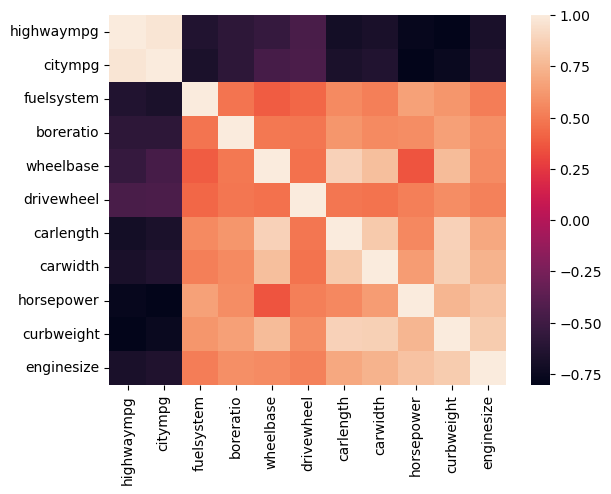

In [43]:
sns.heatmap(data.corr())

In [44]:
x=data
y=df2['price']
X_train,X_test,y_train,y_test= train_test_split(x, y, test_size=0.30, random_state=42)

In [45]:
linear=LinearRegression()
decision = DecisionTreeRegressor()
random = RandomForestRegressor()

# Making a Linear Regression Model by taking engine size as independent value as it has the highest correlation

In [46]:
Eng_train,Eng_test,pri_train,pri_test=train_test_split(df2['enginesize'],y,test_size=0.30,random_state=42)

In [48]:
Eng_train=pd.DataFrame(Eng_train)
Eng_test=pd.DataFrame(Eng_test)
Eng_train

,enginesize
177,122
75,140
174,110
31,92
12,164
...,...
106,181
14,164
92,97
179,171


In [49]:
type(pri_test)

pandas.core.series.Series

In [50]:
linear.fit(Eng_train,pri_train)

LinearRegression()

Text(0.5, 1.0, 'Variation of Price of Car with respect to Engine Size')

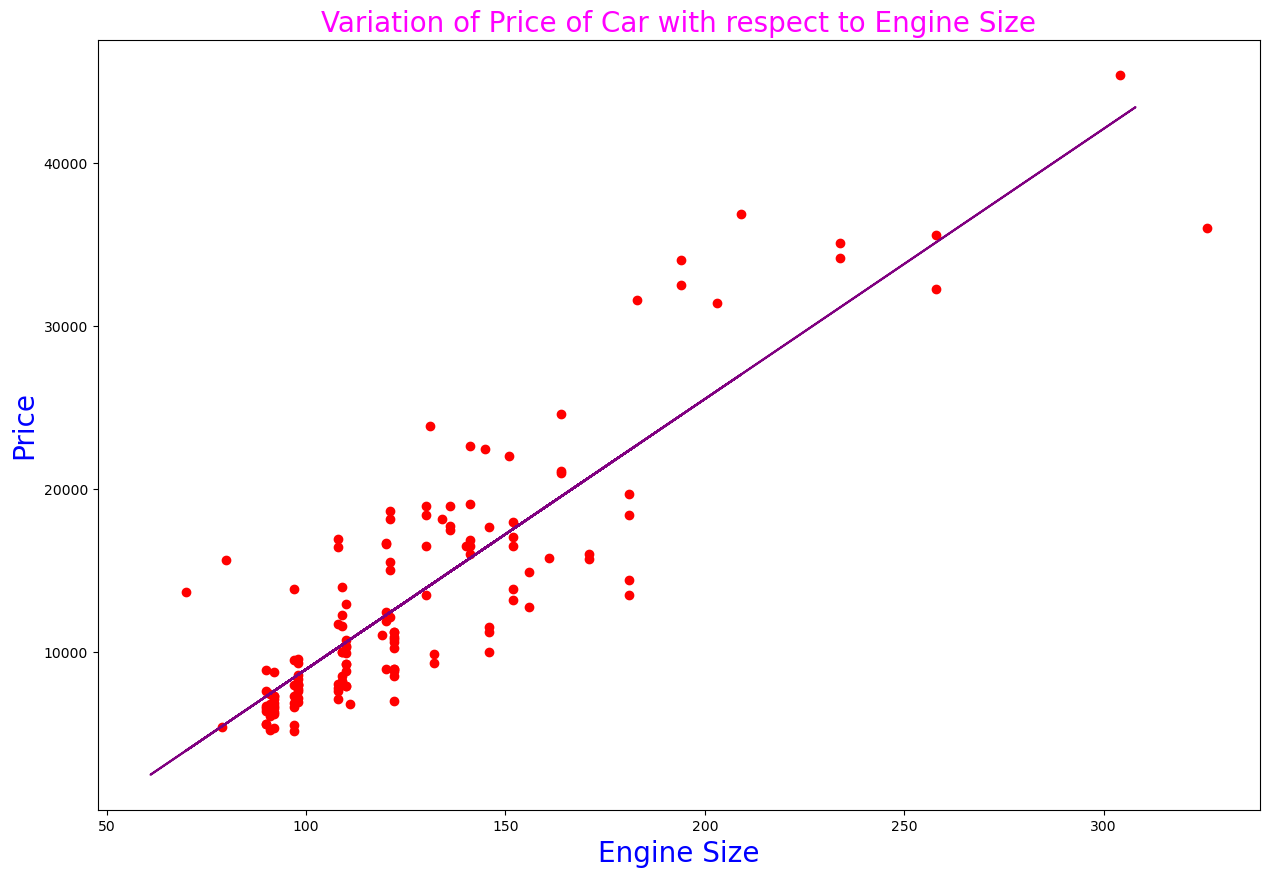

In [51]:

pri_pred=linear.predict(Eng_test)
plt.figure(figsize=(15,10))
plt.scatter(Eng_train,pri_train,color='red')
plt.plot(Eng_test,pri_pred,color='purple')
plt.xlabel('Engine Size',fontsize=20,color='blue')
plt.ylabel('Price',fontsize=20,color='blue')
plt.title('Variation of Price of Car with respect to Engine Size',fontsize=20,color='magenta')

# Plotting decisi tree just for fun

In [52]:
y=list(y)
type(y)

decision.fit(x,y)

DecisionTreeRegressor()

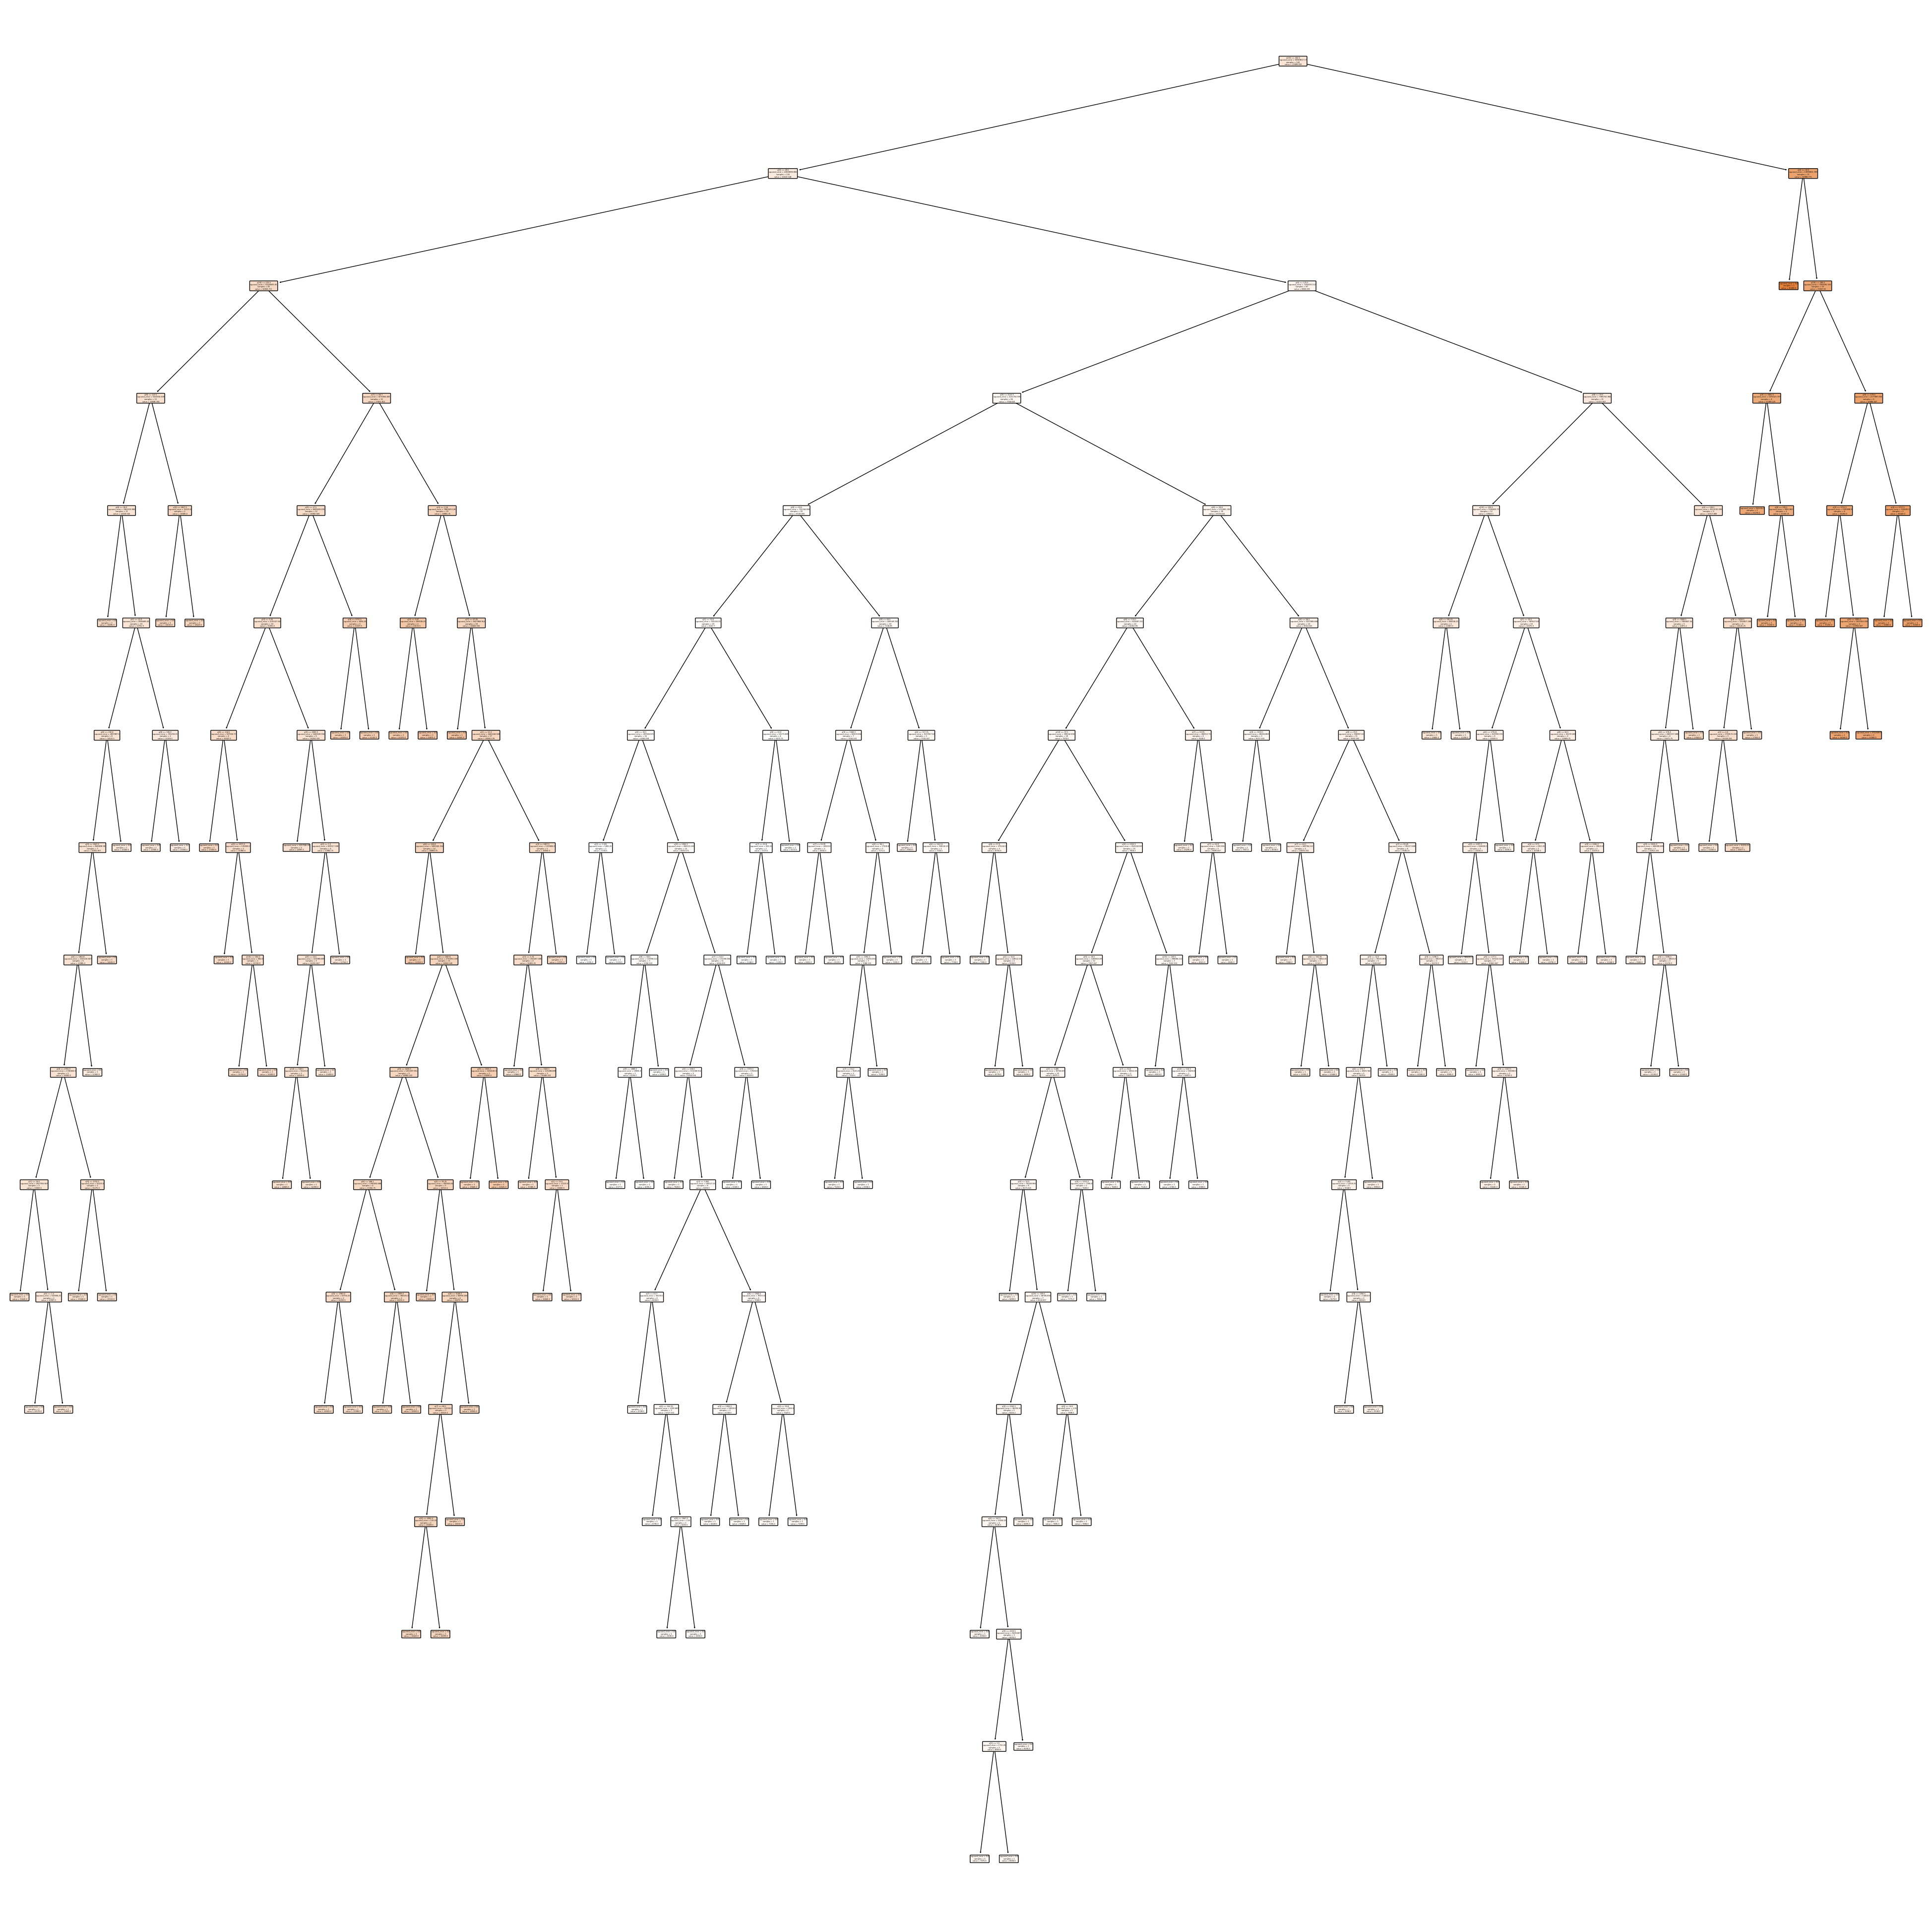

In [158]:
plt.figure(figsize=(50,50))
tree.plot_tree(decision,filled=True,rounded=True);

# Prediction through every model and r square values

In [53]:
models=[linear,decision,random]
d={}
for i in models:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,": R square score is ",r2_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

LinearRegression() : R square score is  77.54480650705264
DecisionTreeRegressor() : R square score is  86.66267340634228
RandomForestRegressor() : R square score is  93.90266061602708


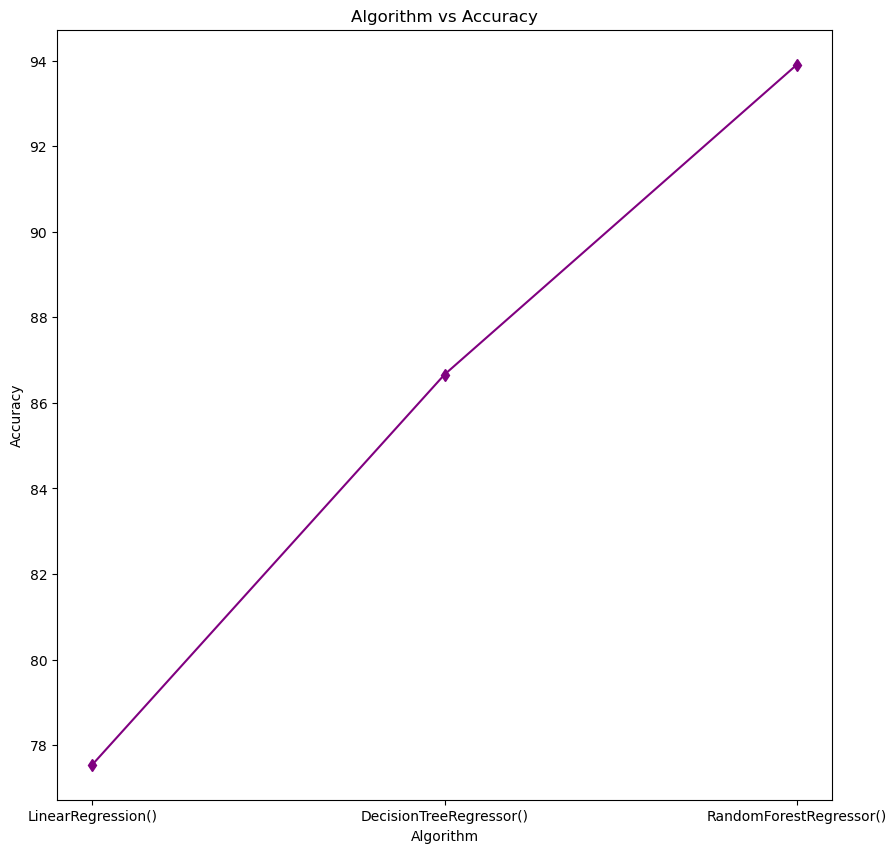

In [54]:
# make graph about Accuracy

plt.figure(figsize=(10,10))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='d',color='purple')
plt.show()